@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/z5rmY-LV7ME

# Árboles de Decisión
### Padecimientos cardíacos
    - Tenemos un dataset con las columnas de 'edad', 'colesterol' y 'problemas cardiacos'

# Gráfica dispersión: Edad y Colesterol

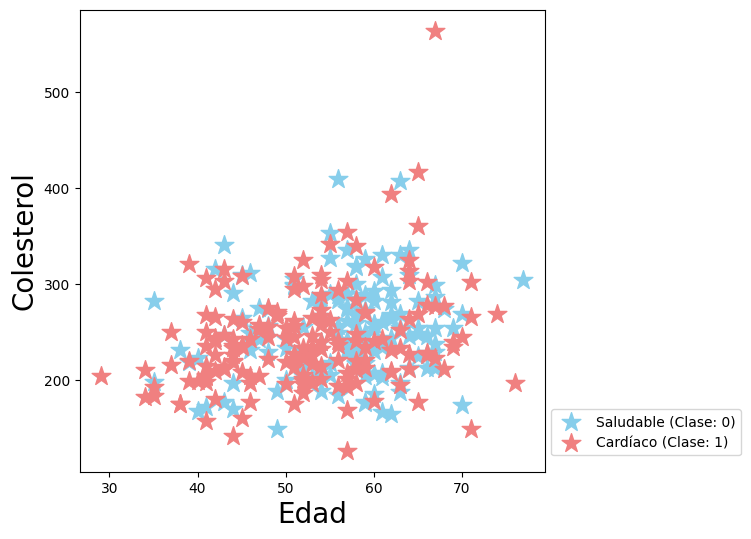

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pacientes = pd.read_csv(
    "H:\FIUBA 2013\ORGANICION DE DATOS\Machine Learning - Organizacion de datos\Datasets\pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel('Edad', fontsize = 20.0)
plt.ylabel('Colesterol', fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"], 
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()


In [14]:
# Mostramos el dataset
pacientes.head()

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


# Entropía:
#### Promedio de información almacenada en una variable aleatoria
- Ejemplo simple de como usar el calculo de la entropía.

In [15]:
from scipy.stats import entropy
from math import log

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))


40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


# Datos de Entrenamiento y Prueba

In [16]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)


# Creación del Árbol de Decisión
- scikit-learn utiliza una versión optimizada del algoritmo CART; Sin embargo, el La implementación de scikit-learn no admite variables categóricas por ahora.

0.6333333333333333
|--- Edad <= 54.50
|   |--- Colesterol <= 273.50
|   |   |--- class: 1
|   |--- Colesterol >  273.50
|   |   |--- class: 0
|--- Edad >  54.50
|   |--- Colesterol <= 353.50
|   |   |--- class: 0
|   |--- Colesterol >  353.50
|   |   |--- class: 1



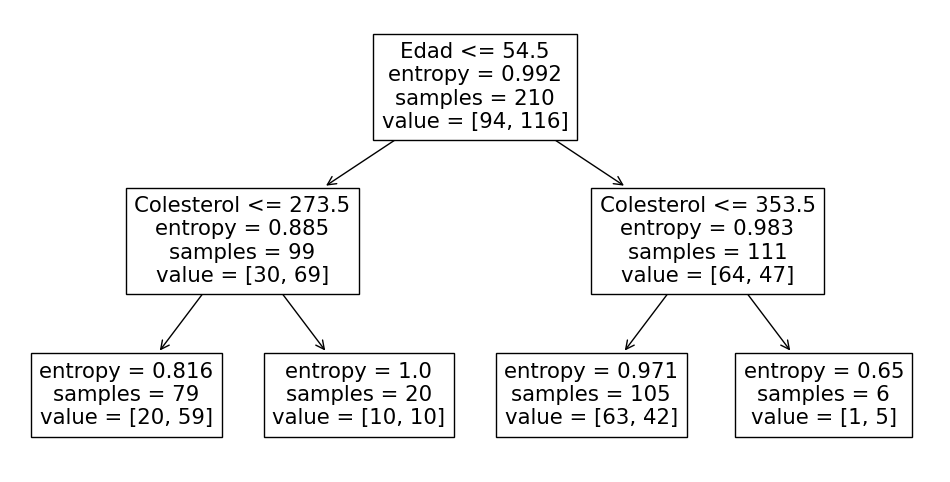

In [17]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)

print(accuracy)

print(tree.export_text(arbol,
                      feature_names=["Edad", "Colesterol"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=["Edad", "Colesterol"])
plt.show()


# Clasifica a nuevos pacientes

In [18]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0]


c:\Programas\Python3-10-6\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>